In [94]:
import fastbook
fastbook.setup_book()

In [95]:
#hide
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.metrics import error_rate
from fastai.vision.data import ImageDataLoaders
from fastai.data.transforms import get_image_files

In [96]:
path = Path('./images/')
path.mkdir(parents=True, exist_ok=True)

In [97]:
fns = get_image_files(path)
fns

(#35887) [Path('images/angry/0.jpg'),Path('images/angry/1.jpg'),Path('images/angry/10.jpg'),Path('images/angry/10002.jpg'),Path('images/angry/10016.jpg'),Path('images/angry/10037.jpg'),Path('images/angry/10038.jpg'),Path('images/angry/10052.jpg'),Path('images/angry/10057.jpg'),Path('images/angry/10063.jpg')...]

In [98]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [99]:
faces = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [100]:
dls = faces.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


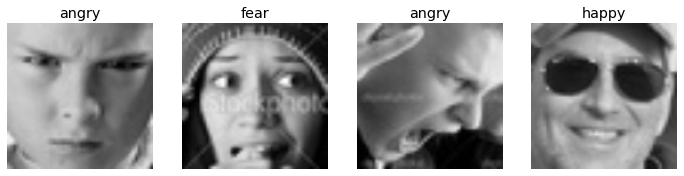

In [101]:
dls.valid.show_batch(max_n=4, nrows=1)

In [102]:
faces = faces.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = faces.dataloaders("./images/")


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\LBachmayr/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:13<00:00, 3.52MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.829137,1.570039,0.600808,37:38


epoch,train_loss,valid_loss,error_rate,time
0,1.395807,1.212166,0.466630,28:38
1,1.171073,1.048416,0.399749,28:14
2,1.101310,0.984395,0.367702,25:10
3,1.029605,0.959007,0.358785,22:39


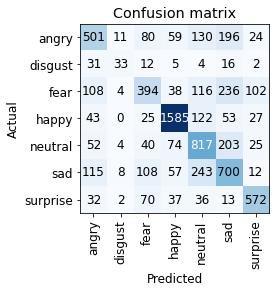

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [25]:
learn.export(os.path.abspath('./face_recognition_model.pkl'))

In [103]:
len = load_learner("./face_recognition_model.pkl",cpu=True,pickle_module=pickle)

In [104]:
btn_upload = widgets.FileUpload()

In [105]:
btn_run = widgets.Button(description='Classify')

In [106]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = len.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [107]:
VBox([widgets.Label('Select a Image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

IndexError: list index out of range